# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
colunas = list(df)
colunas

['Date',
 'Time',
 'Latitude',
 'Longitude',
 'Type',
 'Depth',
 'Depth Error',
 'Depth Seismic Stations',
 'Magnitude',
 'Magnitude Type',
 'Magnitude Error',
 'Magnitude Seismic Stations',
 'Azimuthal Gap',
 'Horizontal Distance',
 'Horizontal Error',
 'Root Mean Square',
 'ID',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

## Liste as primeiras linhas do DataFrame

In [3]:
linhas = []
for i in range(0,30):
    linha=[]
    for x in colunas:
        linha.append(df[x][i])
    linhas.append(linha)


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
df.loc[df['Latitude']<= 0, 'Hemisfério']= 'Sul'
df.loc[df['Latitude']> 0, 'Hemisfério']= 'Norte'


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

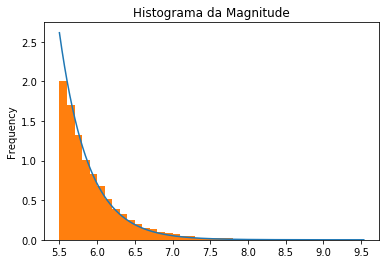

In [5]:
loc = 5.5 #x0
scale = np.mean(df['Magnitude'])-5.5   #média-x0
x =sorted(expon.rvs(loc,scale,len(df['Magnitude'])))
plt.plot(x,expon.pdf(x,loc,scale))
faixa = np.arange(df['Magnitude'].min(),df['Magnitude'].max()+0.1, 0.1)
df['Magnitude'].plot.hist( bins = faixa, normed=True)
plt.title('Histograma da Magnitude')
plt.show()

<em><b>Gráfico 1</b></em>: Histograma da Magnitude com o fit da exponencial

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [6]:
hemxty = pd.crosstab(df['Hemisfério'], df['Type'], normalize=True)
hemxty

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


<em><b>Tabela 1</b></em>: CrossTab entre as variáveis Hemisfério e Type

### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

<p style = ' font-weight:bold;'>Há mais de uma maneira de interpretar essa questão. Pode-se entender que ela busca saber:</p>
<p> <b>I)</b> A probabilidade de, entre todas as situações, ocorrer um terremoto no Norte, que seria aproximadamente 44,71%;</p>


<p><b>II)</b> A probabilidade de que, dado que ocorreu um terremoto, a probabilidade de ter sido no Norte: </p>
<br>
<p style = 'text-indent:2em;' ><b>P(Norte|Terremoto) = P(Norte ∩  Terremoto)/P(Terremoto) </b></p>
<p style = 'text-indent:3em;' >--> P(Norte ∩  Terremoto) = 0,447121</p>
<p style = 'text-indent:3em;' >--> P(Terremoto) = 0,447121+0,545191</p>

In [7]:
Pint = 0.447121
Pterr = 0.447121+0.545191
Pntalt = Pint/Pterr

<p style = 'text-indent:4em;' > Encontrando como resultado 45,05%;</p>

<p><b>II)</b> A probabilidade de que, dado que ocorreu no Norte, a probabilidade de que, entre os possíveis desastres, tenha ocorrido um terremoto: </p>
<br>
<p style = 'text-indent:2em;' ><b>P(Terremoto|Norte) = P(Terremoto ∩  Norte)/P(Norte) </b></p>
<p style = 'text-indent:3em;' >--> P(Terremoto ∩  Norte) = 0,447121</p>
<p style = 'text-indent:3em;' >--> P(Norte) = 0,447121+0,000085+0,006279</p>

In [8]:
Pnort = 0.447121+0.000085+0.006279
Pttaln = Pint/Pnort



<p style = 'text-indent:4em;' > Encontrando como resultado 98,60%.</p>

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [9]:
PNucN= 0.006279
PNuctalN = PNucN/Pnort
print('A probabilidade de ter sido Nuclear Explosion dado que aconteceu no Norte é de {}%'.format(PNuctalN*100))


A probabilidade de ter sido Nuclear Explosion dado que aconteceu no Norte é de 1.3846102958201485%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

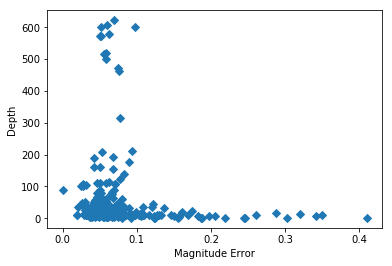

In [10]:
plt.plot(df['Magnitude Error'], df['Depth'], 'D')
plt.xlabel('Magnitude Error')
plt.ylabel('Depth')
plt.show()

<em><b>Gráfico 2</b></em>: Gráfico da dispersão entre as variáveis `Magnitude Error`  e `Depth`

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [11]:
def coVar(x,y):
    mediax = (sum(x)/len(x))
    mediay = (sum(y)/len(y))
    soma = 0
    for i in range(len(x)):
        soma+= (x.iloc[i]-mediax)*(y.iloc[i]-mediay)
    cov = (1/len(x))*soma
    return cov
def desvPad(x):
    mediax = x.mean()
    soma = 0
    for i in range(len(x)):
        soma+= (x.iloc[i] - mediax)**2
    desv = (soma/len(x))**(1/2)
    return desv
def correl(x,y):
    corr = (coVar(x,y))/((desvPad(x))*(desvPad(y)))
    return corr
dados= df.dropna(subset=['Magnitude Error', 'Depth'])


#modo 2 de calcular
corr=np.corrcoef(dados['Magnitude Error'],dados.Depth)[0,1]

   
print('A correlação entre as variáveis é: {}'.format(corr))


A correlação entre as variáveis é: -0.0769184389233872


Explique o que significa o valor da correlação calculada acima? 

<p style = 'text-indent:4em;' >O valor da correlação é negativo, o que indicaria que elas são inversamente proporcionais, ou seja, quando uma aumenta, a outra diminui. Porém, o valor é muito próximo de zero, o que mostra que a associação não é linear, já que há uma grande dispersão entre os dados.</p>

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [12]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

<em><b>Tabela 2</b></em>: Tablea descritiva da Latitude

<p style = 'text-indent:4em;' > A partir da <em><b>Tabela 2</b></em>, é possível extrair o tamanho da amostra(count) e a média entre os valores(mean) que é aproximadamento 1,7 graus, o que indica que a média está nos países próximos à linha do Equador. Além disso, é possível extrair o desvio padrão(std) o qual é grande, mostrando que há uma grande disperção de valores. O máximo e o mínimo também estão presentes, sendo próximos à 90 graus em módulo, mostrando que há valores obtidos de várias áreas do mundo, já que a Latitude está entre +90graus e -90graus. Além disso, é possível obter o valor máximo encontrado entre os 25%, 50% e 75%. Desse modo, percebe-se que a maioria dos valores encontra-se no hemisfério Sul, já que o valor máximo em 50% ainda é negativo, por mais que seja próximo de zero.</p>

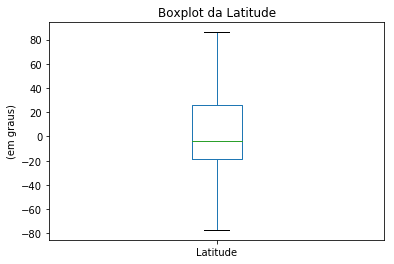

In [13]:
# Boxplot
plot = df.Latitude.plot(kind='box',title='Boxplot da Latitude')
plt.ylabel('(em graus)')
plt.show()

<em><b>Gráfico 3</b></em>: Boxplot da Latiude

<p style = 'text-indent:4em;' >O <em><b>Gráfico 3</b></em> comprova o que foi afirmado anteriormente</p>

In [14]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

<em><b>Tabela 3</b></em>: Tablea descritiva da Longitude

<p style = 'text-indent:4em;' > A partir da <em><b>Tabela 3</b></em>, é possível extrair o tamanho da amostra(count) e a média entre os valores(mean) que é aproximadamento 39,6 graus, o que indica que a média está a leste do meridiano de Greenwich. Além disso, é possível extrair o desvio padrão(std) o qual é grande, mostrando que há uma grande disperção de valores. O máximo e o mínimo também estão presentes, sendo próximos à 180 graus em módulo, mostrando que há valores obtidos de várias áreas do mundo, já que a Longitude está entre +180graus e -180graus. Além disso, é possível obter o valor máximo encontrado entre os 25%, 50% e 75%. Desse modo, percebe-se que a maioria dos valores encontra-se no Oriente, já que o valor máximo em 50% é positivo..</p>

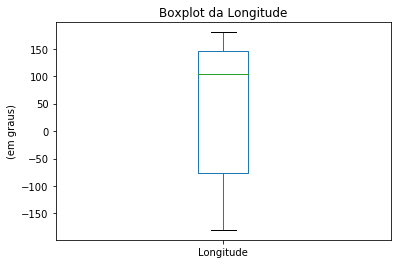

In [15]:
# Boxplot
plot = df.Longitude.plot(kind='box',title='Boxplot da Longitude')
plt.ylabel('(em graus)')
plt.show()

<em><b>Gráfico 4</b></em>: Boxplot da Longitude

<p style = 'text-indent:4em;' >O <em><b>Gráfico 4</b></em> comprova o que foi afirmado anteriormente</p>

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [16]:
#Redução do espaço amostral
novo = df[df['Magnitude Type']=='MB'] #já se sabe que é MB
dadosnovo = novo[novo['Type']=='Nuclear Explosion'] #já se sabe que é Nuclear Explosion

a=dadosnovo['Hemisfério'].value_counts()
probsul = a['Sul']/(a['Sul']+a['Norte'])
probnorte = a['Norte']/(a['Sul']+a['Norte'])
if probsul> probnorte:
    print('Sul')
else:
    print('Norte')  

Norte


<p style = 'text-indent:4em;' > Dado que já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`, há uma maior probabilidade de que o local onde ocorra isso seja no hemisfério Norte.</p>